In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

# import gseapy as gp

from tqdm import tqdm

In [2]:
df = pd.read_csv('attention.csv.gz', index_col=0, low_memory=False)
# tmp = np.load('../../Drug_Response_Prediction_using_GNN/exp/idxs.npy', allow_pickle=True)[1]
# df.index = tmp
# df.columns = tmp
# drug = df[:269]
# drug_gene = drug.iloc[:, 329:]

In [5]:
# human = gp.get_library_name(organism='Human')
# human

In [6]:
# def pad_dict(dictionary, pad_value):
#     max_length = max(len(v) for v in dictionary.values())
#     for key in dictionary:
#         dictionary[key] += [pad_value] * (max_length - len(dictionary[key]))
#     return dictionary

In [7]:
# res = {}
# for i in drug_gene.index:
#     tmp = drug_gene.loc[i]
#     tmp = tmp[tmp != 0]
#     if len(tmp) > 0:
#         res[i] = list(tmp.sort_values(ascending=False).index)
        
# padded_dict = pad_dict(res, None)
# res = pd.DataFrame(padded_dict).T

In [8]:
# results = pd.DataFrame()
# for i in tqdm(res.index):
#     while True:
#         try:
#             enr = gp.enrichr(gene_list=list(res.loc[i].dropna()[:100]), 
#                              gene_sets='MSigDB_Hallmark_2020',
#                              organism='human', 
#                              outdir=None)
#             tmp = enr.results
#             tmp = tmp[tmp['Adjusted P-value'] < 0.05].sort_values(['Adjusted P-value'])[['Term', 'Adjusted P-value', 'Genes']]
#             tmp['drug'] = len(tmp)*[i]
#             results = pd.concat([results, tmp])
#             break
#         except Exception as e:
#             print(f"Error: {e}")
#             print("Retrying...")

In [9]:
# results.drug = results.drug.astype(int)
# results.to_csv('gsea_results.csv')

In [10]:
name = dict(pd.read_csv(
    'nsc_dti.csv', 
    index_col=0)[['NSC', 'Drug Name']].values)

In [12]:
results = pd.read_csv('gsea_results.csv', index_col=0)
results

,Term,Adjusted P-value,Genes,drug
0,Epithelial Mesenchymal Transition,0.001643,SFRP4;POSTN;COL3A1;COL1A2;MMP1;MGP;MMP3,740
1,Angiogenesis,0.009602,POSTN;COL3A1;PRG2,740
2,Allograft Rejection,0.027699,CD7;IL2RG;CD3E;CD3D;ELANE,740
0,Complement,0.000028,CA2;CTSL;LCK;FDX1;PRKCD;PIM1;FYN;CTSS;PIK3CG,752
1,UV Response Up,0.002786,KCNH2;RET;CA2;NTRK3;PRKCD;HSPA2,752
...,...,...,...,...
4,UV Response Up,0.009275,KCNH2;RET;CA2;NTRK3;HSPA2,791785
5,PI3K/AKT/mTOR Signaling,0.012424,LCK;CDK1;RAF1;EGFR,791785
6,Apical Junction,0.014403,KCNH2;SYK;CDH11;MAPK14;EGFR,791785
7,E2F Targets,0.014403,POLE4;WEE1;MELK;CDK1;DCK,791785


In [24]:
results['drug'] = [name[int(i)] for i in results['drug']]
results

,Term,Adjusted P-value,Genes,drug
0,Epithelial Mesenchymal Transition,0.001643,SFRP4;POSTN;COL3A1;COL1A2;MMP1;MGP;MMP3,Methotrexate
1,Angiogenesis,0.009602,POSTN;COL3A1;PRG2,Methotrexate
2,Allograft Rejection,0.027699,CD7;IL2RG;CD3E;CD3D;ELANE,Methotrexate
0,Complement,0.000028,CA2;CTSL;LCK;FDX1;PRKCD;PIM1;FYN;CTSS;PIK3CG,Thioguanine
1,UV Response Up,0.002786,KCNH2;RET;CA2;NTRK3;PRKCD;HSPA2,Thioguanine
...,...,...,...,...
4,UV Response Up,0.009275,KCNH2;RET;CA2;NTRK3;HSPA2,Sapacitabine
5,PI3K/AKT/mTOR Signaling,0.012424,LCK;CDK1;RAF1;EGFR,Sapacitabine
6,Apical Junction,0.014403,KCNH2;SYK;CDH11;MAPK14;EGFR,Sapacitabine
7,E2F Targets,0.014403,POLE4;WEE1;MELK;CDK1;DCK,Sapacitabine


In [25]:
# df = results.groupby('Term')['drug'].count().reset_index().merge(results.groupby('Term')['Adjusted P-value'].mean().reset_index())
# df = df.sort_values('drug', ascending=False)
# df = df[df['drug'] > 10]
# df

,Term,drug,Adjusted P-value
0,Allograft Rejection,264,0.004458
15,KRAS Signaling Up,193,0.014510
5,Complement,170,0.000233
23,UV Response Up,170,0.001037
22,UV Response Dn,169,0.004590
7,E2F Targets,164,0.001308
24,Xenobiotic Metabolism,163,0.005450
3,Apical Junction,156,0.012806
19,PI3K/AKT/mTOR Signaling,152,0.006914
10,G2-M Checkpoint,142,0.005537


In [ ]:
# df.to_csv('gea.csv')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('gea.csv', index_col=0)
df

,Term,drug,Adjusted P-value
0,Allograft Rejection,264,0.004458
15,KRAS Signaling Up,193,0.014510
5,Complement,170,0.000233
23,UV Response Up,170,0.001037
22,UV Response Dn,169,0.004590
7,E2F Targets,164,0.001308
24,Xenobiotic Metabolism,163,0.005450
3,Apical Junction,156,0.012806
19,PI3K/AKT/mTOR Signaling,152,0.006914
10,G2-M Checkpoint,142,0.005537


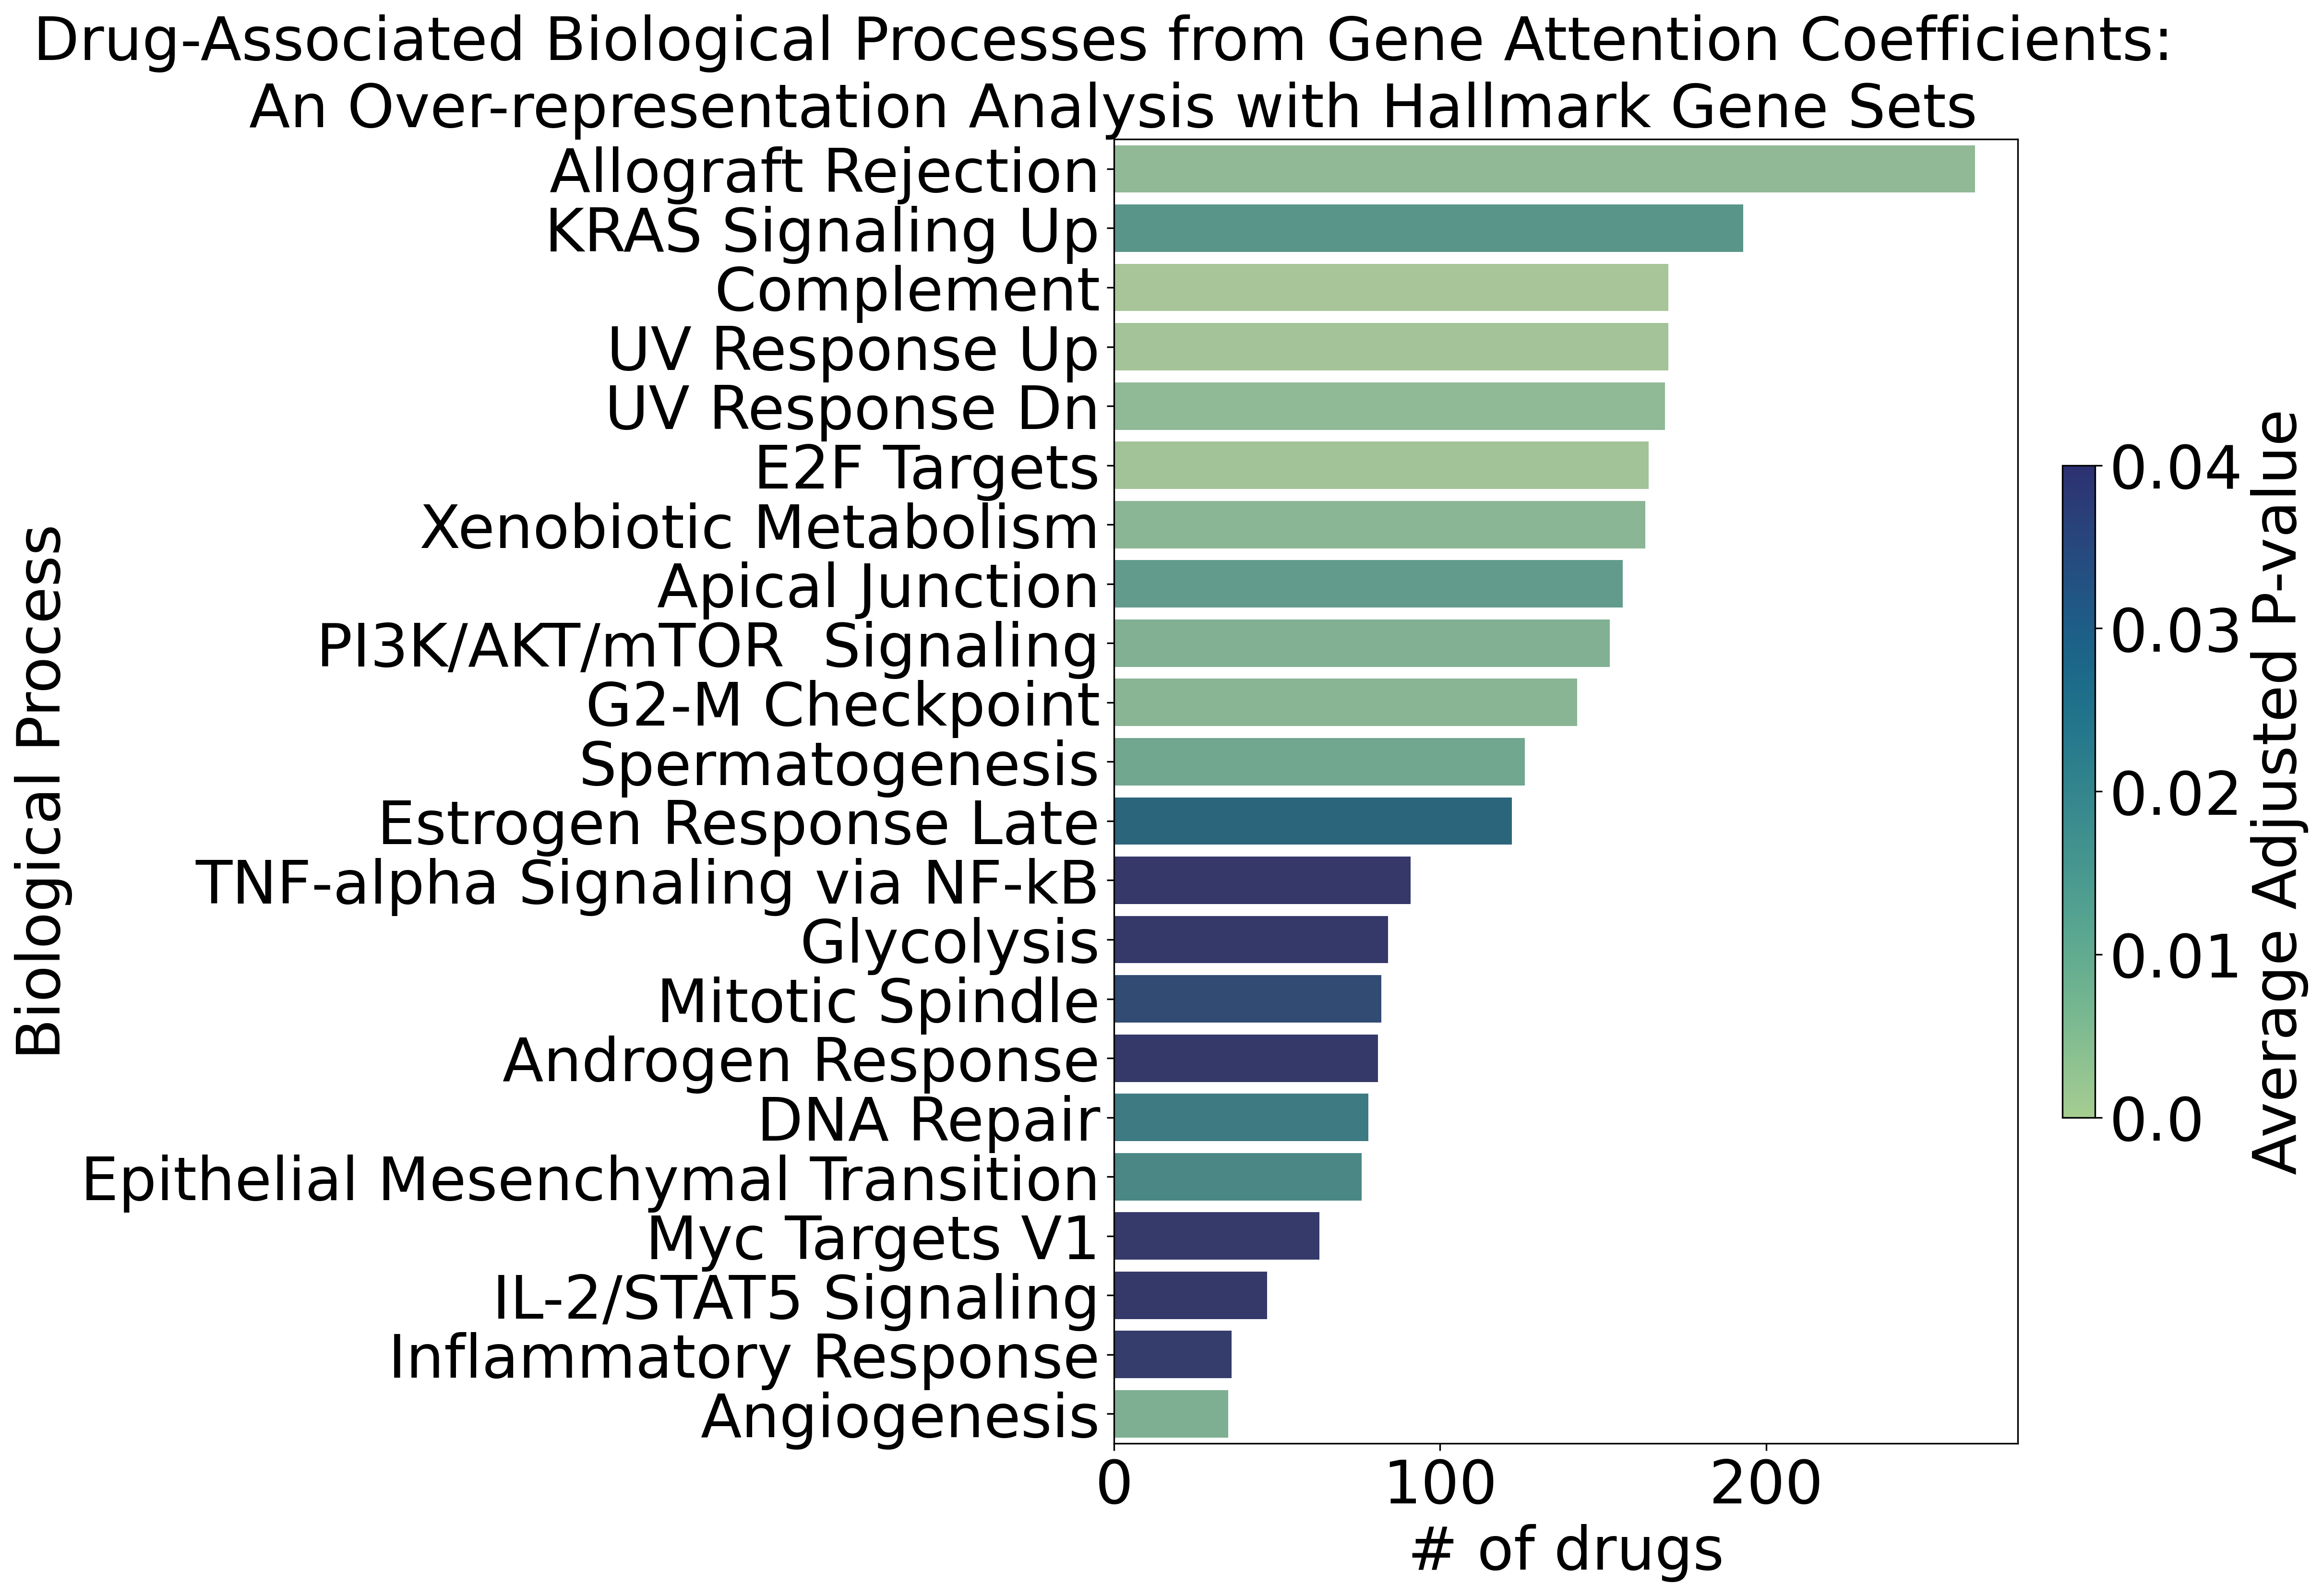

In [5]:
cmap_name = 'crest'
cmap = plt.cm.get_cmap(cmap_name)

plt.rcdefaults()

data = list(df['Adjusted P-value'])

vmin = np.min(data)
vmax = np.max(data)

norm = plt.Normalize(vmin=vmin, vmax=vmax)
colors = [cmap(norm(value)) for value in data]

fig, ax = plt.subplots(figsize=[10, 12], dpi=300)

sns.barplot(
    x='drug', y='Term', 
    data=df.assign(color=colors),  # ここで色の情報をデータフレームに追加
    palette=colors,  # そして、割り当てた色を利用
    dodge=False
)

labelsize=30
ax.tick_params(axis='x', labelsize=labelsize)  # x軸の目盛りフォントサイズ
ax.tick_params(axis='y', labelsize=labelsize) 
ax.set_ylabel('Biological Process', fontsize=labelsize)
ax.set_xlabel('# of drugs', fontsize=labelsize)
ax.set_title(
    'Drug-Associated Biological Processes from Gene Attention Coefficients: \nAn Over-representation Analysis with Hallmark Gene Sets', 
    fontsize=30,
    x=-0.001
)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax, shrink=0.5, pad=0.04)
cbar.set_label('Average Adjusted P-value', fontsize=labelsize)
cbar.set_ticks(np.linspace(vmin, vmax, num=5))  # numを変更して目盛りの数を調整
cbar.set_ticklabels([round(t, 2) for t in np.linspace(vmin, vmax, num=5)])  # 科学的表記で目盛りラベルを設定
cbar.ax.tick_params(labelsize=labelsize)

plt.show()